In [25]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
housing = pd.read_csv('Cleaned Housing.csv')
housing

,Unnamed: 0,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,SoldAsVacant,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,0,25542,Residential,Antioch,2019-12-13,118500,No,Antioch,0.24,Urban Services District,22000.0,67500.0,89500.0,1991,3,2,0
1,1,55343,Residential,Nashville,2016-10-31,205000,No,Nashville,0.35,Urban Services District,26000.0,85500.0,111500.0,1954,3,1,0
2,2,55740,Residential,Nashville,2016-10-31,412000,No,Nashville,0.35,Urban Services District,176000.0,99600.0,280100.0,1952,2,1,0
3,3,56328,Residential,Old Hickory,2016-10-31,465000,No,Old Hickory,0.41,General Services District,90000.0,308400.0,398400.0,2003,4,3,1
4,4,56231,Residential,Nashville,2016-10-31,398031,No,Nashville,0.16,Urban Services District,27000.0,40200.0,67200.0,1933,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23700,23700,204,Residential,Brentwood,2013-01-02,1365000,No,Brentwood,1.99,General Services District,280800.0,1184700.0,1465500.0,2006,4,4,1
23701,23701,298,Land,Nashville,2013-01-02,72500,No,Nashville,0.15,Urban Services District,60000.0,368200.0,459800.0,2013,5,3,1
23702,23702,217,Residential,Nashville,2013-01-02,50000,No,Nashville,0.17,Urban Services District,45000.0,48200.0,93200.0,1918,3,1,0
23703,23703,378,Residential,Nashville,2013-01-02,152000,No,Nashville,0.30,Urban Services District,22500.0,114700.0,139100.0,1974,4,3,0


In [46]:
housing.SalePrice = housing.SalePrice.replace('[\$,]', '', regex= True)
housing.SalePrice = housing.SalePrice.astype('int')
housing.dtypes

Unnamed: 0           int64
UniqueID             int64
LandUse             object
PropertyAddress     object
SaleDate            object
SalePrice            int32
SoldAsVacant        object
OwnerAddress        object
Acreage            float64
TaxDistrict         object
LandValue          float64
BuildingValue      float64
TotalValue         float64
YearBuilt            int64
Bedrooms             int64
FullBath             int64
HalfBath             int64
dtype: object

# Basic EDA:

### 1) What are the value counts of each type of land use in the cleaned dataset? 

In [27]:
housing.LandUse.value_counts(normalize=True)

Residential    0.988863
Land           0.009534
Commercial     0.001266
Industrial     0.000337
Name: LandUse, dtype: float64

#### From this we can deduce that the Nashville real estate market consisted of more than 98% Reseidential properties being sold in the time period covered by the dataset. 

### 2) What are the value counts of the SoldAsVacant Feature? 

In [28]:
housing.SoldAsVacant.value_counts(normalize=True)

No     0.982704
Yes    0.017296
Name: SoldAsVacant, dtype: float64

#### From this we can deduce that more than 98% of the real estate sold in Nashville was not sold as vacant.

### 3) What are the value counts of the Tax Districts in the dataset?

In [29]:
housing.TaxDistrict.value_counts(normalize = True)

Urban Services District      0.763215
General Services District    0.180806
City Of Goodlettsville       0.015440
City Of Oak Hill             0.015187
City Of Forest Hills         0.015187
City Of Belle Meade          0.009281
City Of Berry Hill           0.000886
Name: TaxDistrict, dtype: float64

### 4) What are the value counts of the property and owner addresses? 

In [30]:
housing.PropertyAddress.nunique()

10

In [31]:
housing.PropertyAddress.value_counts(normalize=True)

 Nashville         0.787808
 Antioch           0.054166
 Madison           0.051339
 Hermitage         0.043240
 Old Hickory       0.035014
 Goodlettsville    0.019194
 Brentwood         0.007678
 Whites Creek      0.000802
 Joelton           0.000464
 Mount Juliet      0.000295
Name: PropertyAddress, dtype: float64

In [32]:
housing.OwnerAddress.nunique()

10

In [33]:
housing.OwnerAddress.value_counts(normalize=True)

 Nashville         0.787851
 Antioch           0.054166
 Madison           0.051339
 Hermitage         0.043240
 Old Hickory       0.035014
 Goodlettsville    0.019194
 Brentwood         0.007636
 Whites Creek      0.000802
 Joelton           0.000464
 Mount Juliet      0.000295
Name: OwnerAddress, dtype: float64

### 5) What are the summary statistics for the quantitative features?

In [34]:
housing[['SalePrice','Acreage','LandValue','BuildingValue','TotalValue','Bedrooms','FullBath','HalfBath']].describe()

,Acreage,LandValue,BuildingValue,TotalValue,Bedrooms,FullBath,HalfBath
count,23705.000000,2.370500e+04,2.370500e+04,2.370500e+04,23705.000000,23705.000000,23705.000000
mean,0.455836,6.904970e+04,1.730583e+05,2.447819e+05,3.094115,1.896984,0.286648
std,0.793932,1.021612e+05,1.935828e+05,2.723682e+05,0.850667,0.955172,0.489565
min,0.040000,1.000000e+02,1.400000e+03,1.260000e+04,0.000000,0.000000,0.000000
25%,0.190000,2.200000e+04,8.390000e+04,1.098000e+05,3.000000,1.000000,0.000000
50%,0.270000,2.990000e+04,1.176000e+05,1.548000e+05,3.000000,2.000000,0.000000
75%,0.450000,6.030000e+04,1.892000e+05,2.782000e+05,4.000000,2.000000,1.000000
max,47.500000,1.869000e+06,5.824300e+06,6.402600e+06,11.000000,10.000000,3.000000


# More detailed EDA and Data Visualisation:

### 1) Relationship between Land/Property Type and other features:

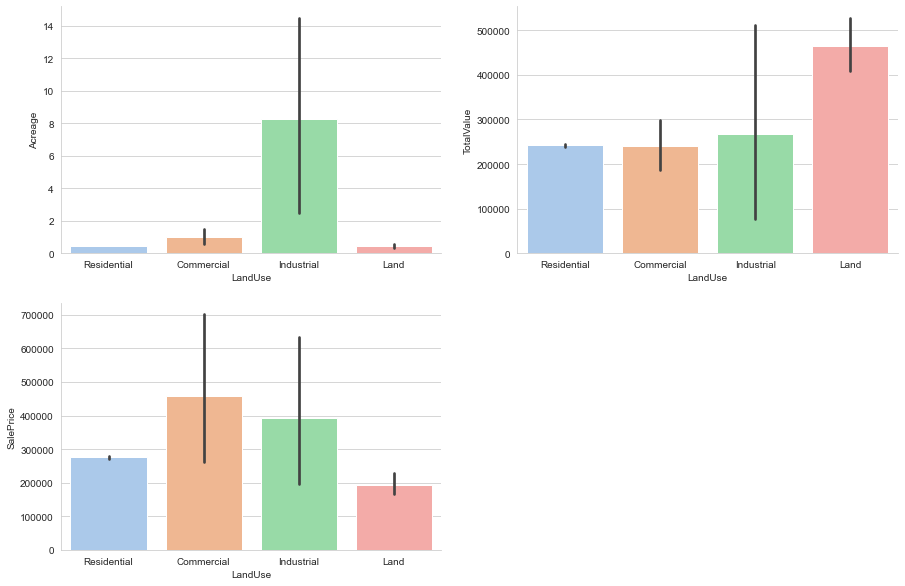

In [69]:
plt.figure(figsize=(15,10))
sns.set_palette('pastel')

plt.subplot(2,2,1)
sns.barplot(x='LandUse', y = 'Acreage', data = housing)

plt.subplot(2,2,2)
sns.barplot(x='LandUse', y= 'TotalValue', data = housing)

plt.subplot(2,2,3)
sns.barplot(x='LandUse', y = 'SalePrice', data = housing)

sns.despine()
sns.set_style('whitegrid')
plt.show()

### 2) Relationship between Property Address and other features:

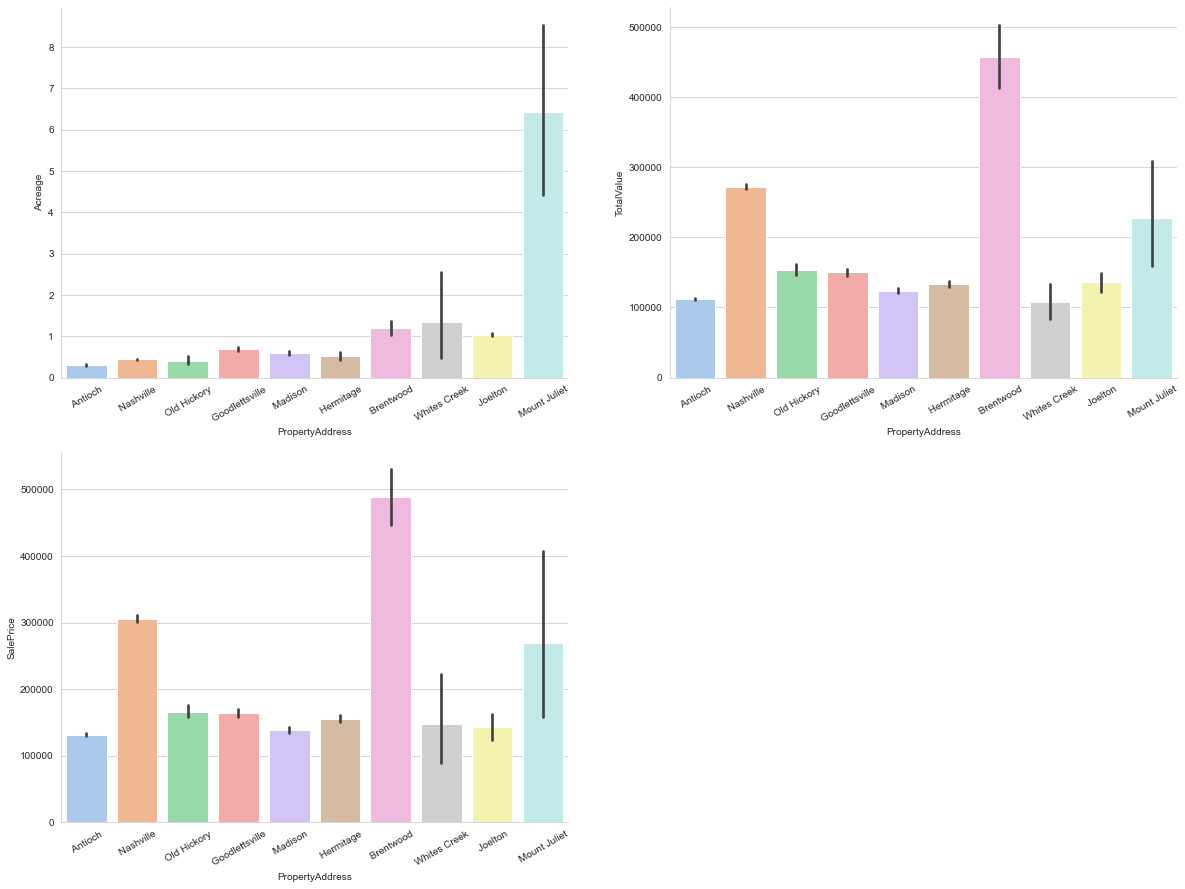

In [67]:
plt.figure(figsize=(20,15))
sns.set_palette('pastel')

plt.subplot(2,2,1)
sns.barplot(x='PropertyAddress', y = 'Acreage', data = housing)
plt.xticks(rotation = 30)

plt.subplot(2,2,2)
sns.barplot(x='PropertyAddress', y= 'TotalValue', data = housing)
plt.xticks(rotation = 30)

plt.subplot(2,2,3)
sns.barplot(x='PropertyAddress', y = 'SalePrice', data = housing)
plt.xticks(rotation = 30)

sns.despine()
sns.set_style('whitegrid')
plt.show()

### 3) Relationships between Sale Price and other quantitative features:

In [74]:
from scipy.stats import pearsonr

In [103]:
corr1, r1 = pearsonr(housing.TotalValue, housing.SalePrice)

corr2, r2 = pearsonr(housing.Acreage, housing.SalePrice)

corr3, r3 = pearsonr(housing.Bedrooms, housing.SalePrice)

corr4, r4 = pearsonr(housing.FullBath, housing.SalePrice)

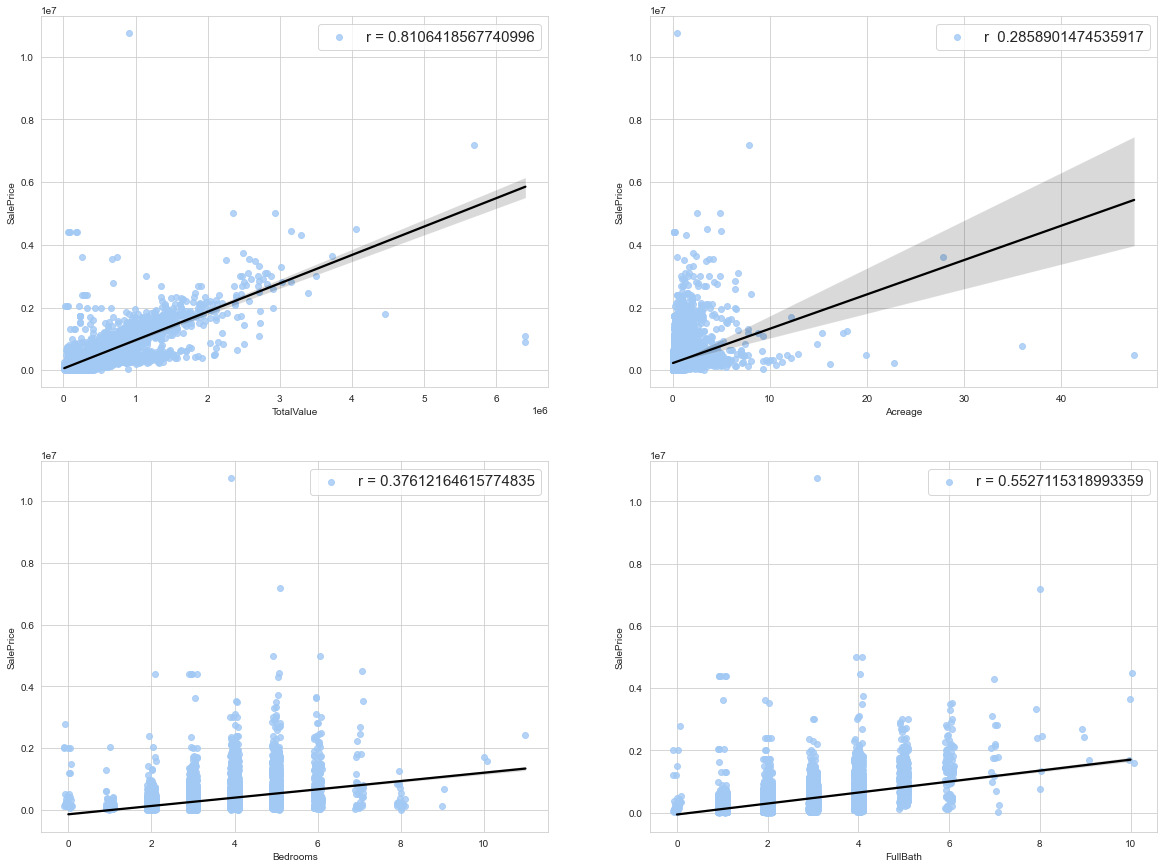

In [107]:
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
sns.regplot(x='TotalValue', y = 'SalePrice', data = housing, line_kws = {'color':'black'}, label = 'r = ' + str(corr1))
plt.legend(fontsize = 15)

plt.subplot(2,2,2)
sns.regplot(x='Acreage', y= 'SalePrice', data = housing, line_kws={'color':'black'}, label = 'r  ' + str(corr2))
plt.legend(fontsize = 15)

plt.subplot(2,2,3)
sns.regplot(x='Bedrooms', y = 'SalePrice', data = housing, line_kws={'color':'black'}, label= 'r = ' + str(corr3), x_jitter = 0.1)
plt.legend(fontsize = 15)

plt.subplot(2,2,4)
sns.regplot(x='FullBath', y = 'SalePrice', data = housing, line_kws={'color':'black'}, label= 'r = ' + str(corr4), x_jitter = .1)
plt.legend(fontsize = 15)

plt.show()